# **IMPORTS**

In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as pp

# **PREP**

In [2]:
%matplotlib inline

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

# **INPECTION**

In [3]:
print(train.shape, "\n")
print(train["label"].value_counts(), "\n")
train.head(2)

(31962, 3) 

0    29720
1     2242
Name: label, dtype: int64 



,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked


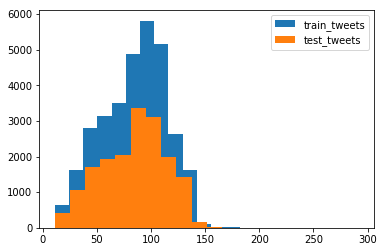

In [4]:
length_train = train['tweet'].str.len() 
length_test = test['tweet'].str.len() 
pp.hist(length_train, bins=20, label="train_tweets") 
pp.hist(length_test, bins=20, label="test_tweets") 
pp.legend() 
pp.show()

# **CLEANING**

In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, " ", input_txt)
    return (input_txt)

In [6]:
def remove_small(input_txt):
    aux = input_txt.split(" ")
    for index in range(len(aux)):
        if (len(aux[index]) <= 3):
            aux[index] = ""
    return (" ".join(aux))

In [7]:
def split_new(txt):
    return (txt.split())

In [8]:
all_df = train.append(test, ignore_index=True)
all_df.head()

copy1 = all_df.copy()
copy2 = all_df.copy()

/home/bento.fortes/anaconda3/envs/SETE/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
copy1["clean"] = np.vectorize(remove_pattern)(copy1["tweet"], "@[\w]*")

In [10]:
copy1.head(10)

,id,label,tweet,clean
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


In [11]:
copy2["clean"] = copy2["tweet"].apply(remove_pattern, args=(["@[\w]*"]))

In [12]:
copy2.head(10)

,id,label,tweet,clean
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


# attempted np.vectorize() no me gusta

In [89]:
df_all = copy2.copy()
copy1 = df_all.copy()

In [90]:
copy1['clean'] = copy1['clean'].str.replace("[^a-zA-Z#]", " ") 
copy1.head()

,id,label,tweet,clean
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [91]:
copy1["clean"] = copy1["clean"].apply(remove_small)
copy1.head()

,id,label,tweet,clean
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


# **NLTK PORTERSTEMMER**

In [122]:
tokens = copy1["clean"].apply(split_new)

In [123]:
tokens.head()
#stemmer.stem(" ".join(tokens[1]))

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: clean, dtype: object

In [124]:
from nltk.stem.porter import *

stemmer = PorterStemmer()
tokens = tokens

In [125]:
def stem_new(tkn):
    if (type(tkn) is list):
        for index in range(len(tkn)):
            tkn[index] = stemmer.stem(tkn[index])
        tkn = " ".join(tkn)
    return (tkn)

In [126]:
tokens = tokens.apply(stem_new)

In [127]:
tokens.head()

0                  when father dysfunct selfish drag kid into dysfunct #run
1    thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                       bihday your majesti
3                                                #model love take with time
4                                                  factsguid societi #motiv
Name: clean, dtype: object

In [128]:
copy1["clean"] = tokens
copy1.head()

,id,label,tweet,clean
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# **WORD CLOUD**

In [129]:
from wordcloud import WordCloud

In [130]:
all_words = " ".join(copy1["clean"])

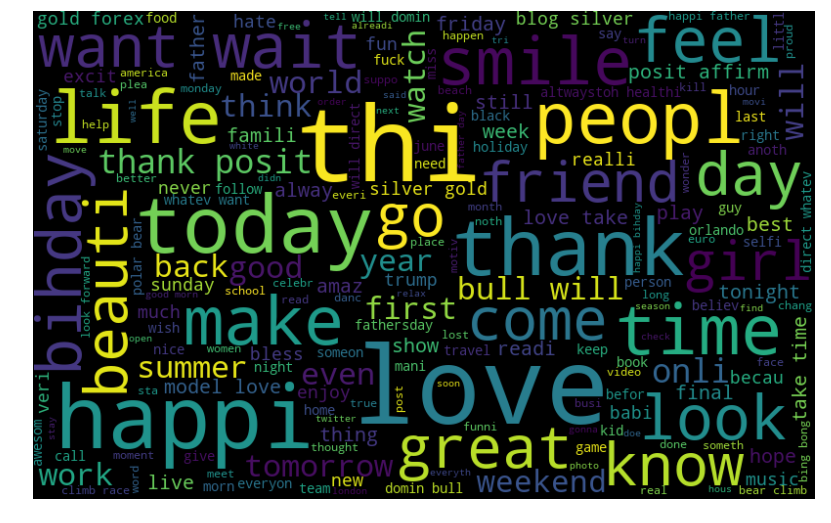

In [131]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

pp.figure(figsize=(14, 10))
pp.imshow(wordcloud, interpolation="bilinear")
pp.axis('off')
pp.show()

In [132]:
normal_all = copy1["clean"].loc[(copy1["label"] == 0)]
normal_all = " ".join(normal_all)

In [133]:
bad_all = copy1["clean"].loc[(copy1["label"] == 1)]
bad_all = " ".join(bad_all)

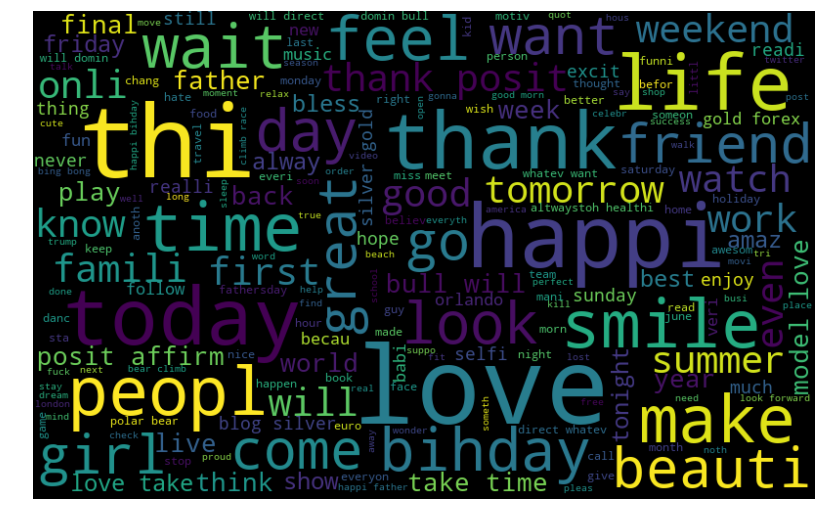

In [134]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_all)

pp.figure(figsize=(14, 10))
pp.imshow(wordcloud, interpolation="bilinear")
pp.axis('off')
pp.show()

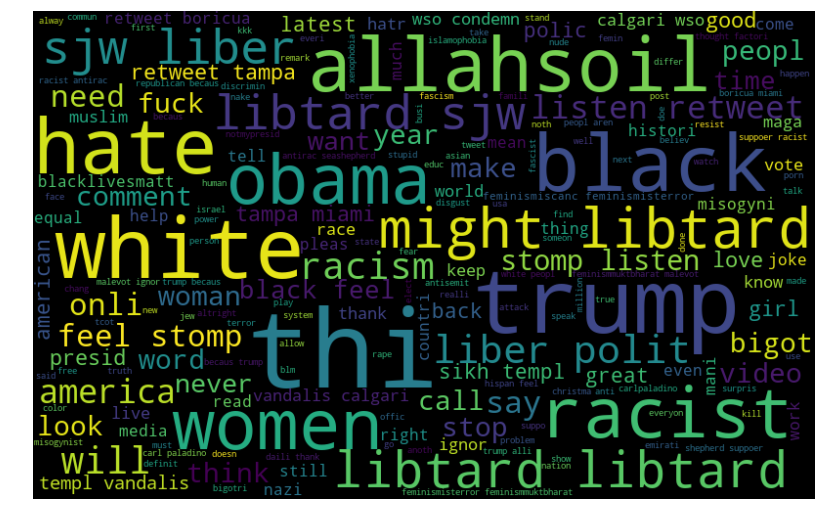

In [135]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(bad_all)

pp.figure(figsize=(14, 10))
pp.imshow(wordcloud, interpolation="bilinear")
pp.axis('off')
pp.show()

# **HASHTAGUES**

In [138]:
def get_hash(tkn):
    result = list()
    for i in tkn:
        ht = re.findall(r"#(\w+)", i)
        result.append(ht)
    if (len(result) != 0):
        return (result)

In [139]:
ht_normal = get_hash(copy1["clean"][copy1["label"] == 0])

In [140]:
ht_bad = get_hash(copy1["clean"][copy1["label"] == 1])

In [141]:
normal_sum = sum(ht_normal, list())
bad_sum = sum(ht_bad, list())

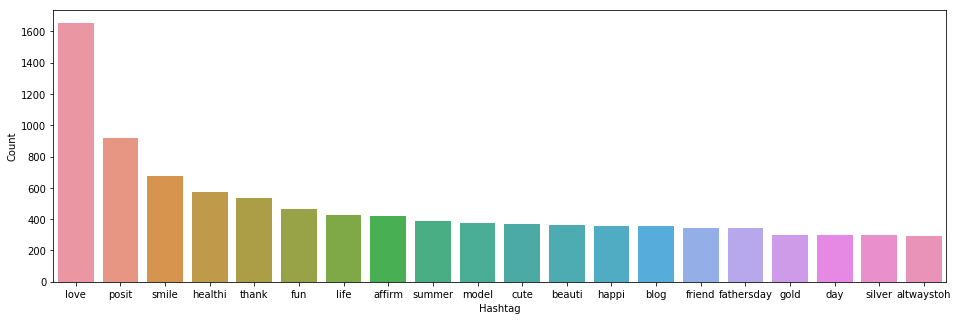

In [142]:
a = nltk.FreqDist(normal_sum)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 20)
pp.figure(figsize=(16,5))
ax = sb.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
pp.show()

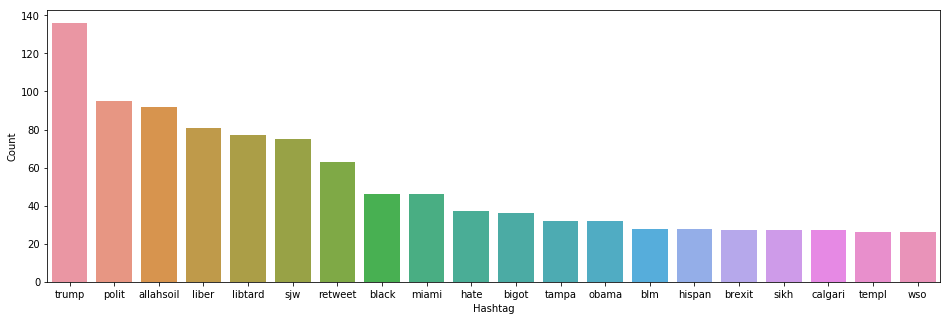

In [143]:
a = nltk.FreqDist(bad_sum)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 20)
pp.figure(figsize=(16,5))
ax = sb.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
pp.show()